# ML Practice 1.1 (Iris) — Хайбулин Никита Сергеевич (гр. 955-М)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

np.random.seed(42)
sns.set(style="whitegrid")

In [3]:
# Загрузка датасета Iris и преобразование в DataFrame
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("✓ Данные загружены. Форма:", df.shape)


✓ Данные загружены. Форма: (150, 6)


In [4]:
# быстрый просмотр строк
display(df.head())

# типы данных и пропуски
df.info()

# базовая статистика распределений
display(df.describe())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   species            150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Визуализация и интерпретация (EDA)

- как признаки соотносятся между собой (pairplot),
- какие признаки коррелируют (heatmap),
- как выглядят распределения по видам (гистограммы).


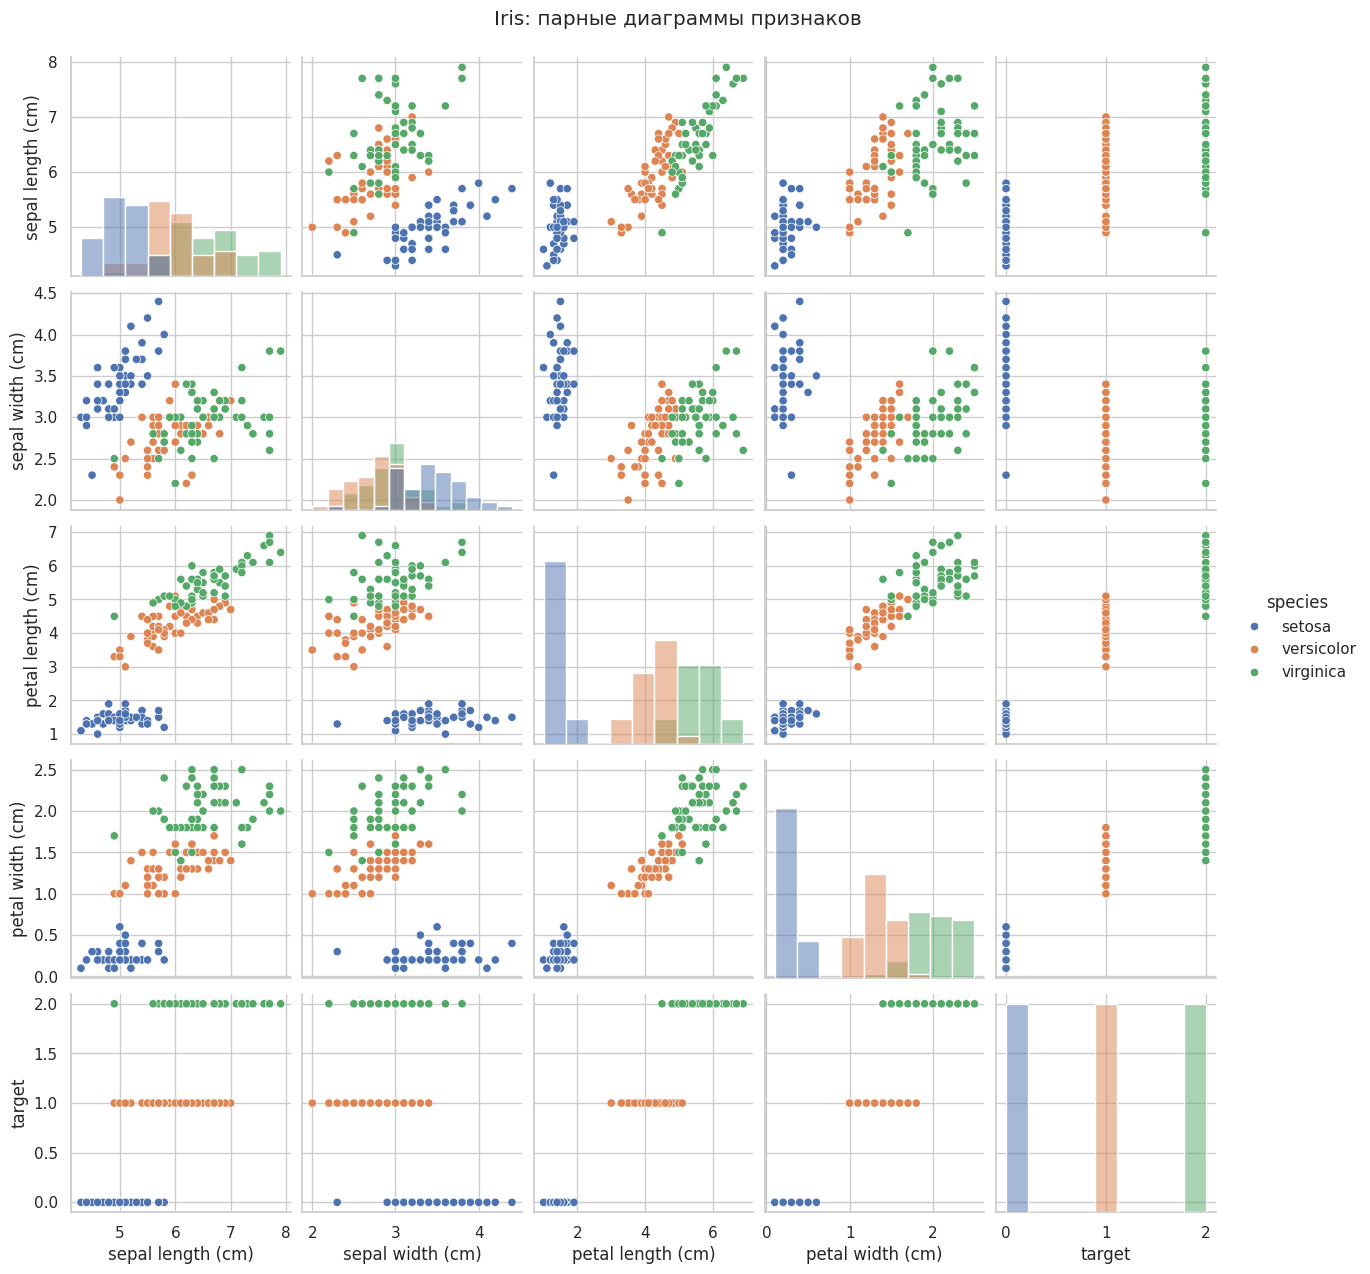

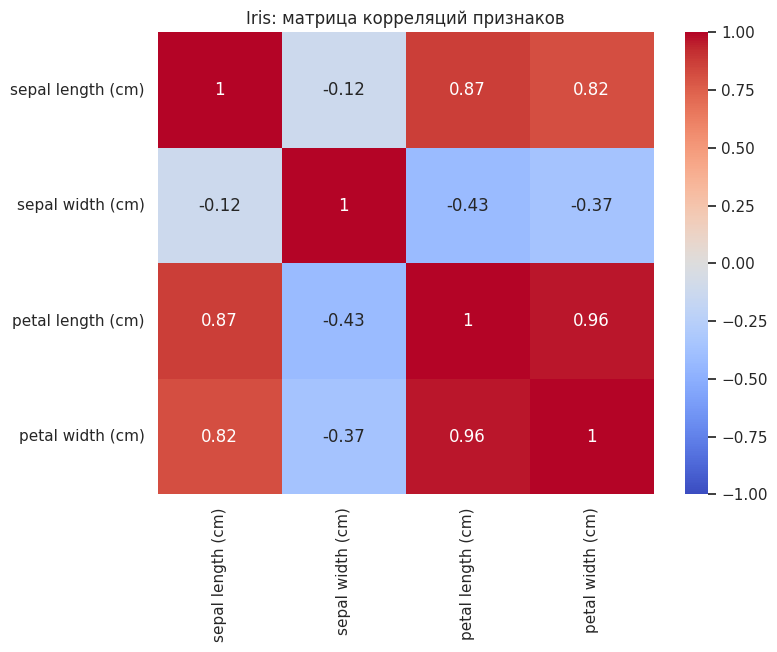

In [5]:
# Визуализация взаимосвязей признаков
# Примечание: pairplot может строиться несколько секунд.
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Iris: парные диаграммы признаков", y=1.02)
plt.show()

# Тепловая карта корреляций (по числовым признакам)
plt.figure(figsize=(8, 6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Iris: матрица корреляций признаков")
plt.show()


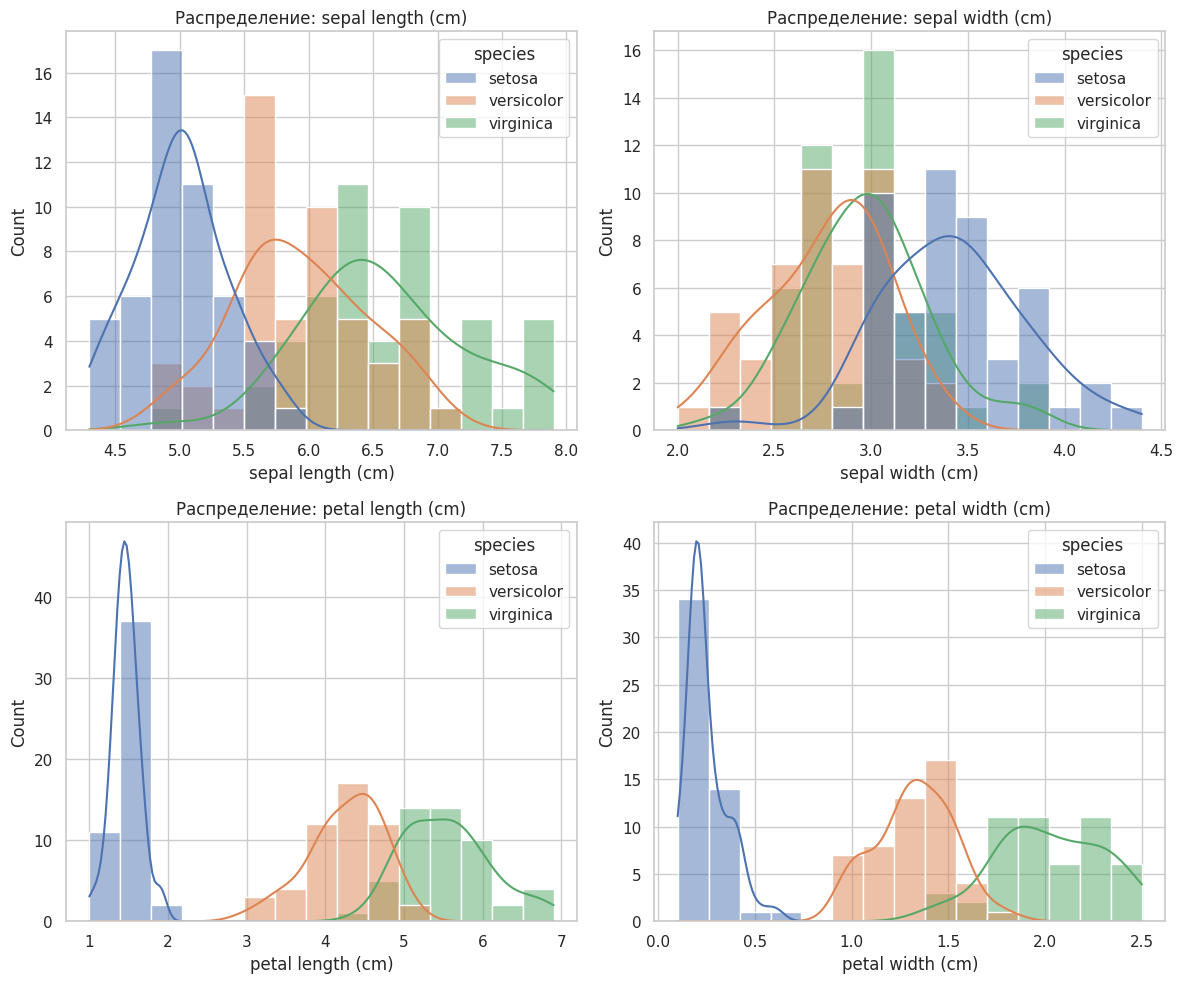

In [6]:
# Анализ распределений признаков по видам
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for idx, col in enumerate(iris.feature_names):
    ax = axes[idx // 2, idx % 2]
    sns.histplot(data=df, x=col, hue="species", kde=True, ax=ax, bins=15)
    ax.set_title(f"Распределение: {col}")
plt.tight_layout()
plt.show()


In [7]:
# Разделение на X и y (обязательный чек-лист)
# - X: матрица признаков (4 числовых столбца)
# - y: целевая переменная (метки классов)
X = df[iris.feature_names].values
y = df["target"].values

print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")


Размер X: (150, 4)
Размер y: (150,)


# Самостоятельные задания

## Задание 1. Анализ выбросов (boxplots)
Нужно:
1) построить boxplot для каждого признака с разбивкой по видам;  
2) проверить выбросы у *Iris virginica* по признаку `sepal width (cm)`;  
3) посчитать процент наблюдений за границами “усов”.

**Почему используем IQR-правило:** boxplot определяет выбросы через межквартильный размах (IQR):  
- нижняя граница: `Q1 - 1.5 * IQR`  
- верхняя граница: `Q3 + 1.5 * IQR`


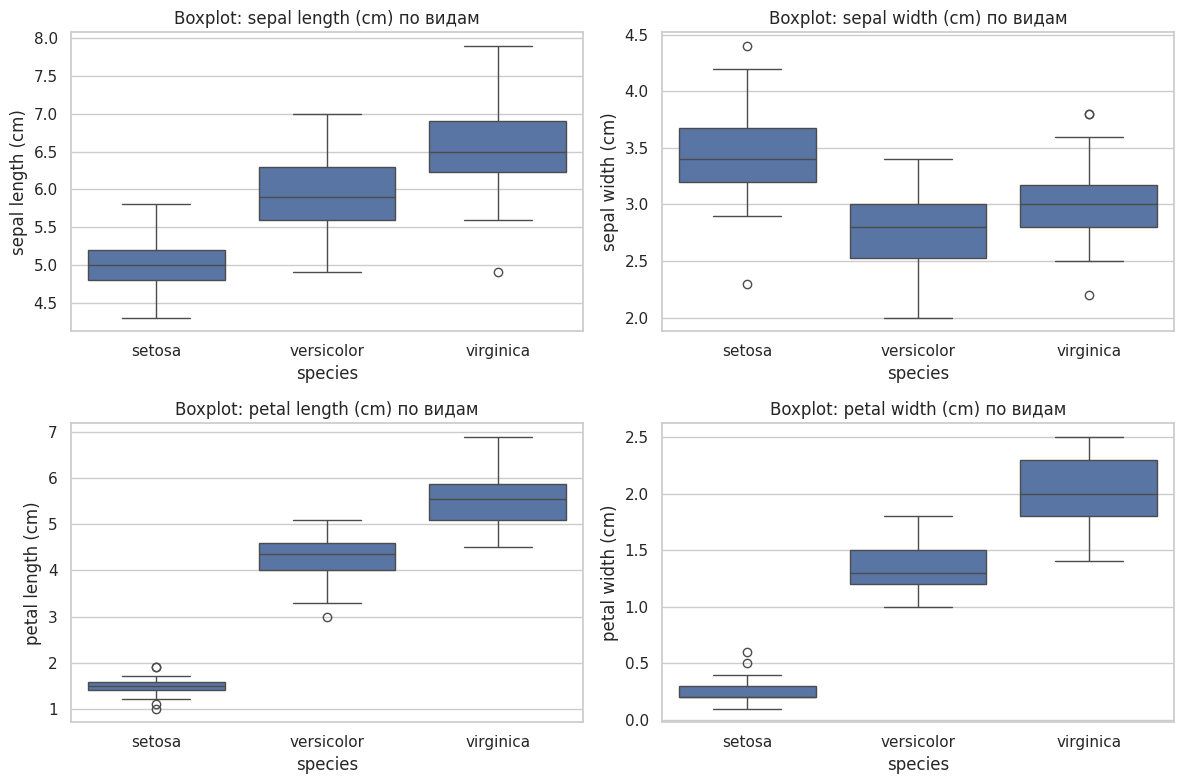

Q1=2.8000, Q3=3.1750, IQR=0.3750
Границы усов: [2.2375; 3.7375]
Выбросов: 3 из 50 (6.0%)
Значения выбросов: [2.2, 3.8, 3.8]


In [8]:
# boxplots + выбросы для Iris virginica (sepal width)
feature_cols = iris.feature_names

# Boxplot для каждого признака по видам (4 графика)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(feature_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=df, x="species", y=col, ax=ax)
    ax.set_title(f"Boxplot: {col} по видам")
plt.tight_layout()
plt.show()

# Выбросы по IQR-правилу ТОЛЬКО для virginica по признаку sepal width (cm)
col = "sepal width (cm)"
virginica = df.loc[df["species"] == "virginica", col]

q1 = virginica.quantile(0.25)
q3 = virginica.quantile(0.75)
iqr = q3 - q1

low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

outliers = virginica[(virginica < low) | (virginica > high)]
percent = len(outliers) / len(virginica) * 100

print(f"Q1={q1:.4f}, Q3={q3:.4f}, IQR={iqr:.4f}")
print(f"Границы усов: [{low:.4f}; {high:.4f}]")
print(f"Выбросов: {len(outliers)} из {len(virginica)} ({percent:.1f}%)")
print("Значения выбросов:", outliers.sort_values().to_list())


## Задание 2. Коэффициент вариации (CV)
Нужно посчитать:  
`CV = (std / mean) * 100%` для каждого признака.

**Зачем:** CV показывает относительную изменчивость: сравнивать std напрямую нельзя, когда средние/масштабы разные.

**Почему важно для нормализации:** признаки с большим разбросом “доминируют” в алгоритмах, чувствительных к масштабу (kNN, SVM, градиентные методы без регуляризации), поэтому перед обучением часто применяют масштабирование (StandardScaler/MinMaxScaler).


CV (%) по убыванию:


,CV_%
petal width (cm),63.56
petal length (cm),46.97
sepal width (cm),14.26
sepal length (cm),14.17


Наиболее изменчивый признак: petal width (cm) (CV=63.56%)


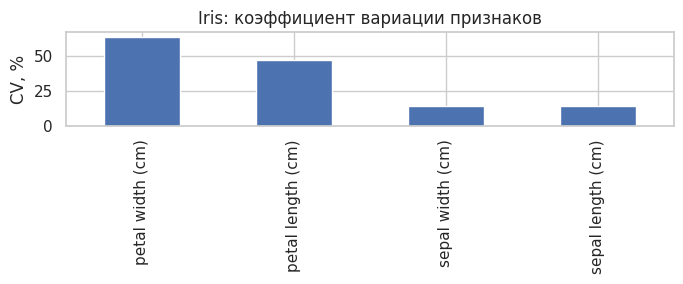

In [9]:
# коэффициент вариации (CV) для признаков Iris
cv = (df[feature_cols].std(ddof=1) / df[feature_cols].mean()) * 100
cv_sorted = cv.sort_values(ascending=False)

print("CV (%) по убыванию:")
display(cv_sorted.to_frame("CV_%").round(2))

most_variable = cv_sorted.index[0]
print(f"Наиболее изменчивый признак: {most_variable} (CV={cv_sorted.iloc[0]:.2f}%)")

plt.figure(figsize=(7, 3))
cv_sorted.plot(kind="bar")
plt.ylabel("CV, %")
plt.title("Iris: коэффициент вариации признаков")
plt.tight_layout()
plt.show()


### Интерпретация задания 2
- Признак с самым большим CV — **наиболее “шумный/вариативный” относительно среднего**.  
- При подготовке данных к моделям это сигнал, что:
  - (а) масштабирование желательно,
  - (б) возможно, стоит проверить распределение/выбросы.


## Задание 3. Производный признак `petal_length / petal_width`
Нужно:
1) создать `petal_ratio = petal length (cm) / petal width (cm)`;  
2) построить гистограмму этого признака по видам;  
3) оценить, улучшает ли он разделение классов по сравнению с исходными признаками.


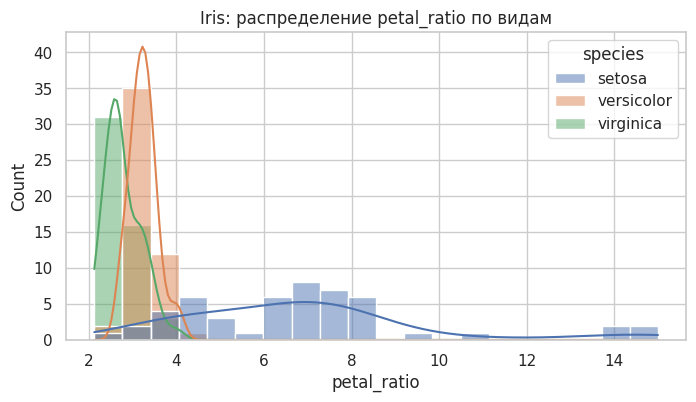

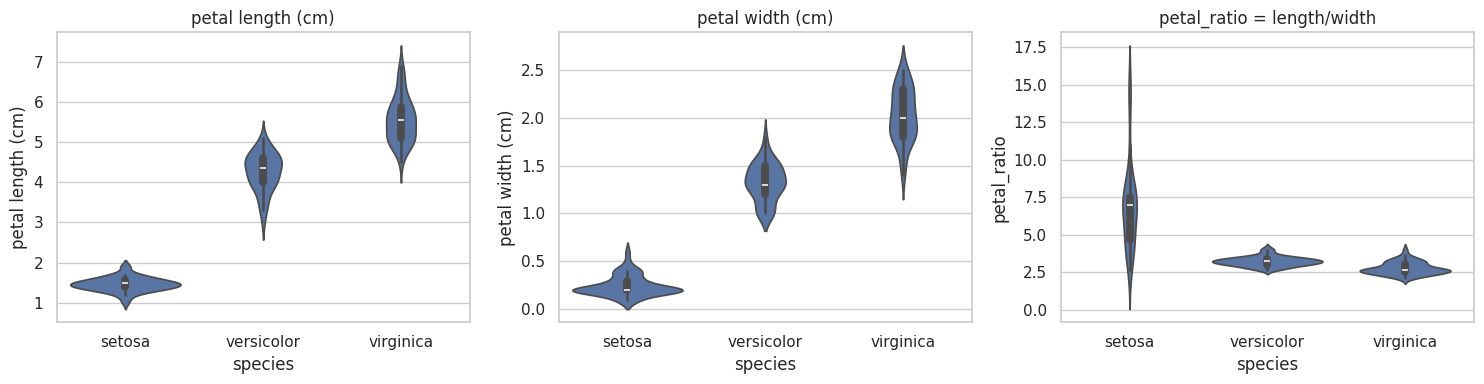

In [10]:
# создание petal_ratio и сравнение разделения
df["petal_ratio"] = df["petal length (cm)"] / df["petal width (cm)"]

# Гистограмма petal_ratio по видам
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="petal_ratio", hue="species", kde=True, bins=20)
plt.title("Iris: распределение petal_ratio по видам")
plt.show()

# Для сравнения построим violinplot для исходных признаков и нового
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.violinplot(data=df, x="species", y="petal length (cm)", ax=axes[0])
axes[0].set_title("petal length (cm)")

sns.violinplot(data=df, x="species", y="petal width (cm)", ax=axes[1])
axes[1].set_title("petal width (cm)")

sns.violinplot(data=df, x="species", y="petal_ratio", ax=axes[2])
axes[2].set_title("petal_ratio = length/width")

plt.tight_layout()
plt.show()


### Интерпретация задания 3
- Если `petal_ratio` показывает **больше перекрытия** между *versicolor* и *virginica* (по сравнению с `petal length`/`petal width`), значит новый признак **не улучшает** разделение.
- Если перекрытие стало меньше — значит признак полезен как feature engineering.


# Выводы
Датасет Iris небольшой и хорошо подходит для обучения EDA: все признаки числовые, пропусков нет, а классы подписаны.
Наиболее информативными для разделения видов обычно оказываются признаки лепестка (`petal length`, `petal width`), тогда как `sepal width` разделяет классы слабее.
Boxplot-анализ показывает, что даже в “учебных” датасетах могут встречаться статистические выбросы, которые важно уметь находить и корректно интерпретировать.
